In [1]:
from scipy.ndimage import imread
import numpy as np
import io
import re
import matplotlib.pyplot as plt
#  %matplotlib inline
% matplotlib notebook
plt.rcParams['figure.figsize'] = (10.0, 4.0) # set default size of plots

In [2]:
root = "../data/"
train_dir = root + "stage1_train/"
image_id = "00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552"
image_path = train_dir + image_id + "/images/" + image_id + ".png"
train_label_path = root + "stage1_train_labels.csv"
save_path = "/Users/user/Desktop/git/ronjian.github.io/assets/2018_Data_Science_Bowl_Notes/"

In [3]:
# read image into matrix/ndarray
img_np = imread(image_path)
img_np.shape

(256, 256, 4)

In [4]:
plt.rcParams['figure.figsize'] = (3.0, 3.0) # set default size of plots
plt.imshow(img_np)
plt.title("sample")
plt.savefig(save_path + "sample.png")
plt.show()
plt.rcParams['figure.figsize'] = (10.0, 4.0) # set default size of plots

<IPython.core.display.Javascript object>

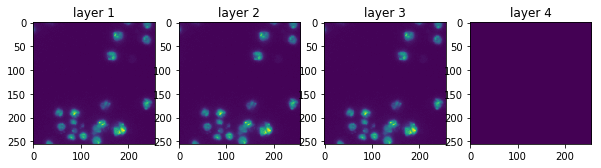

In [5]:
# each layer display, from left to right is 1st to 4th layer
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img_np[:,:,i])
    plt.title("layer %s" % str(i+1))
plt.savefig(save_path + "sample_each_layer.png")
plt.show()

In [6]:
# img_np is the sample image's matrix in 3D in shape (256x256x4)
# flatten the 3D ndarray into 1D for the following statement by organizer
# "The pixels are one-indexed and numbered from top to bottom, 
# then left to right: 1 is pixel (1,1), 2 is pixel (2,1), etc".
# Note that the flatten order is by column ('F')
flatten_img_np = img_np.flatten('F')
flatten_img_np.shape

(262144,)

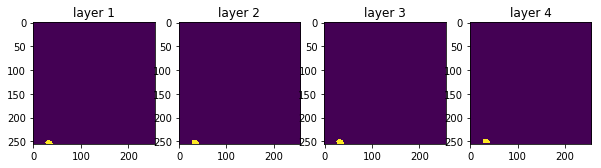

In [7]:
""" one object understanding """
# Manually remove the image id "00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552,"
line = "6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440 9 8696 9 8952 9 9209 8 9465 8 9722 7 9978 7 10235 6 10493 4 10752 1"
# parse the sequence of number into 
# such a list with each element's structure in (start_point, respective run-length)
l = line.split(" ")
detect_pixels = []
for i in range(len(l)):
    if i % 2 == 0:
        start_point = int(l[i])
    else:
        run_length = int(l[i])
        detect_pixels.append((start_point, run_length))
# mark label object as WHITE in 1D matrix
# background is #BLACK
label_np_1d_one_object = np.zeros_like(flatten_img_np) # fill in BLACK
for x in detect_pixels:
    start_point, run_length = x
    label_np_1d_one_object[start_point: start_point + run_length] = 255 # WHITE
# reverse process against the previous flatten process
# to transform the 1D matrix with label in WHITE and 
# everything else in BLACK into 3D matrix for display.
label_np_one_object = np.stack((label_np_1d_one_object[0:0+256*256 ].reshape(256,256).T,
                      label_np_1d_one_object[1:1+256*256 ].reshape(256,256).T,
                      label_np_1d_one_object[2:2+256*256 ].reshape(256,256).T,
                      label_np_1d_one_object[3:3+256*256 ].reshape(256,256).T
                      ), axis = -1)

# each layer display, from left to right is 1st to 4th layer
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(label_np_one_object[:,:,i])
    plt.title("layer %s" % str(i+1))
plt.savefig(save_path + "label_one_object_image.png")
plt.show()

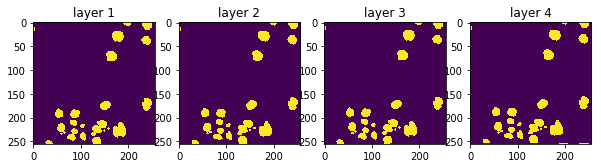

In [8]:
""" multiple objects understanding """
# loop and seek all label objects for a specific image
# parse the sequence of number into 
# such a list with each element's structure in (start_point, respective run-length)
detect_pixels = []
with io.open(train_label_path ,'r') as f:
    for line in f:
        if re.search(image_id , line) is not None:
            l = re.sub(image_id+",", "", line.strip("\n")).split(" ")
            for i in range(len(l)):
                if i % 2 == 0:
                    start_point = int(l[i])
                else:
                    run_length = int(l[i])
                    detect_pixels.append((start_point, run_length))
# mark label object as WHITE in 1D matrix
# background is #BLACK
label_np_1d = np.zeros_like(flatten_img_np)
for x in detect_pixels:
    start_point, run_length = x
    label_np_1d[start_point: start_point + run_length] = 255 # WHITE
# reverse process against the previous flatten process
# to transform the 1D matrix with label in WHITE and 
# everything else in BLACK into 3D matrix for display.
label_np = np.stack((label_np_1d[0:0+256*256 ].reshape(256,256).T,
                      label_np_1d[1:1+256*256 ].reshape(256,256).T,
                      label_np_1d[2:2+256*256 ].reshape(256,256).T,
                      label_np_1d[3:3+256*256 ].reshape(256,256).T
                      ), axis = -1)
# each layer display, from left to right is 1st to 4th layer
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(label_np[:,:,i])
    plt.title("layer %s" % str(i+1))
plt.savefig(save_path + "label_image.png")
plt.show()